### 네이버 데이터 랩에서 키워드 가져오기
 * 파일명 : datalab_word.xlsx
 * 시트명은 입력을 받음.
 * 데이터 랩에서 10대부터 전체 목록에 대한 급상승 검색어를 가지고 온다.

In [1]:
from IPython.display import display
from PIL import Image

In [7]:
filename = "datalab_word.xlsx"

In [8]:
# 해당 시트명 입력
sheetname = input("시트명을 입력해 주세요:")

시트명을 입력해 주세요:20201013


In [9]:
# -*- coding: utf-8 -*-
import os
os.getcwd()

from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome('chromedriver_84')

## http://www.opinet.co.kr/searRgSelect.do 접속 
driver.get('https://datalab.naver.com/keyword/realtimeList.naver')

In [10]:
## 10대  //*[@id="content"]/div/div[2]/div[1]/div[2]/div/div/div/ul/li[1]/a
## 20대  //*[@id="content"]/div/div[2]/div[1]/div[2]/div/div/div/ul/li[2]/a
## 30대  //*[@id="content"]/div/div[2]/div[1]/div[2]/div/div/div/ul/li[3]/a
# ...
## 전체  //*[@id="content"]/div/div[2]/div[1]/div[2]/div/div/div/ul/li[6]/a

In [11]:
import time

In [12]:
sel_10 = driver.find_element_by_xpath('//*[@id="content"]/div/div[2]/div[1]/div[2]/div/div/div/ul/li[1]/a')
sel_20 = driver.find_element_by_xpath('//*[@id="content"]/div/div[2]/div[1]/div[2]/div/div/div/ul/li[2]/a')
sel_30 = driver.find_element_by_xpath('//*[@id="content"]/div/div[2]/div[1]/div[2]/div/div/div/ul/li[3]/a')
sel_40 = driver.find_element_by_xpath('//*[@id="content"]/div/div[2]/div[1]/div[2]/div/div/div/ul/li[4]/a')
sel_50 = driver.find_element_by_xpath('//*[@id="content"]/div/div[2]/div[1]/div[2]/div/div/div/ul/li[5]/a')
sel_60 = driver.find_element_by_xpath('//*[@id="content"]/div/div[2]/div[1]/div[2]/div/div/div/ul/li[6]/a')

In [13]:
sel_10.click()

In [14]:
soup = BeautifulSoup(driver.page_source, 'lxml')
age_10 = soup.find_all("span", class_ = "item_title")
age_10

[<span class="item_title">로건</span>,
 <span class="item_title">정은주</span>,
 <span class="item_title">이근 성추행</span>,
 <span class="item_title">이성경</span>,
 <span class="item_title">2020 9월 모의고사</span>,
 <span class="item_title">루엘</span>,
 <span class="item_title">정배우</span>,
 <span class="item_title">유웨이어플라이</span>,
 <span class="item_title">한양여자대학교</span>,
 <span class="item_title">동아방송예술대학교</span>,
 <span class="item_title">설인아</span>,
 <span class="item_title">ebs 온라인 클래스</span>,
 <span class="item_title">아자르</span>,
 <span class="item_title">연성대학교</span>,
 <span class="item_title">더쇼</span>,
 <span class="item_title">가짜사나이 로건</span>,
 <span class="item_title">순간포착 세상에 이런일이</span>,
 <span class="item_title">부천대학교</span>,
 <span class="item_title">수원대학교</span>,
 <span class="item_title">에이틴 어게인</span>]

In [15]:
pop_10 = []
for i in age_10:
    text = i.text
    pop_10.append(text)
    
pop_10

['로건',
 '정은주',
 '이근 성추행',
 '이성경',
 '2020 9월 모의고사',
 '루엘',
 '정배우',
 '유웨이어플라이',
 '한양여자대학교',
 '동아방송예술대학교',
 '설인아',
 'ebs 온라인 클래스',
 '아자르',
 '연성대학교',
 '더쇼',
 '가짜사나이 로건',
 '순간포착 세상에 이런일이',
 '부천대학교',
 '수원대학교',
 '에이틴 어게인']

### 전체를 가져와 보기

In [16]:
import time

In [17]:
base_xpath1 = '//*[@id="content"]/div/div[2]/div[1]/div[2]/div/div/div/ul/li['
base_xpath2 = ']/a'

all_word = []
for i in range(1,7):
    all_xpath = base_xpath1 + str(i) + base_xpath2
    sel_btn = driver.find_element_by_xpath(all_xpath)
    sel_btn.click()
    
    soup = BeautifulSoup(driver.page_source, 'lxml')
    age_data = soup.find_all("span", class_ = "item_title")
    
    pop_10 = []
    for i in age_data:
        text = i.text
        pop_10.append(text)
    time.sleep(2)
    all_word.append(pop_10)
    print(pop_10)
    
all_word

['로건', '정은주', '이근 성추행', '이성경', '2020 9월 모의고사', '루엘', '정배우', '유웨이어플라이', '한양여자대학교', '동아방송예술대학교', '고등학생 독감 무료접종', '설인아', '더쇼', '아자르', '연성대학교', '가짜사나이 로건', '에이틴 어게인', '라이브온', '부천대학교', '윤상훈']
['정은주', '로건', '정의선', '윤상훈', '이근 성추행', '정배우', '이성경', '신비한 동물들과 그린델왈드의 범죄', '무엇이든 물어보살 21살', '박근형', '가짜사나이 로건', '구본길', '설인아', '화요일 예능', '소리도 없이', '펜싱 김준호', '너드', '무엇이든 물어보살', '정도명 철학원', '순간포착 세상에 이런일이']
['윤상훈', '정의선', '정은주', 'k아카데미', '허양임', '박근형 손자', '박근형', '고지용', '로건', '박근형 아들', '구본길', '공부가 머니', '너드 뜻', '너드', '소리도 없이', '너드미', '이근 성추행', '이성경', '신비한 동물들과 그린델왈드의 범죄', '정배우']
['윤상훈', '정의선', '허양임', '박근형 손자', 'k아카데미', '고지용', '너드 뜻', '박근형 아들', '너드미', '박근형', '너드', '구본길', '박승재', '이성경', '공부가 머니', '정은주', '신비한 동물들과 그린델왈드의 범죄', '순간포착 세상에 이런일이', '이근 성추행', '소리도 없이']
['윤상훈', '너드 뜻', '정의선', '고지용', '허양임', '너드미', '신동욱 아나운서', '이수혁', '김동식 교수', '임성훈', '김호중 파트너', '너드', '모종화', '박근형 손자', '박근형 아들', '정몽구', '순간포착 세상에 이런일이', '금수남가', '김홍철', '박근형']
['윤상훈', '정의선', '정은주', '허양임', '너드 뜻', '고지용', '로건', '박근형 손자', 'k아카데미', '박근형', '박근형 아들', '

[['로건',
  '정은주',
  '이근 성추행',
  '이성경',
  '2020 9월 모의고사',
  '루엘',
  '정배우',
  '유웨이어플라이',
  '한양여자대학교',
  '동아방송예술대학교',
  '고등학생 독감 무료접종',
  '설인아',
  '더쇼',
  '아자르',
  '연성대학교',
  '가짜사나이 로건',
  '에이틴 어게인',
  '라이브온',
  '부천대학교',
  '윤상훈'],
 ['정은주',
  '로건',
  '정의선',
  '윤상훈',
  '이근 성추행',
  '정배우',
  '이성경',
  '신비한 동물들과 그린델왈드의 범죄',
  '무엇이든 물어보살 21살',
  '박근형',
  '가짜사나이 로건',
  '구본길',
  '설인아',
  '화요일 예능',
  '소리도 없이',
  '펜싱 김준호',
  '너드',
  '무엇이든 물어보살',
  '정도명 철학원',
  '순간포착 세상에 이런일이'],
 ['윤상훈',
  '정의선',
  '정은주',
  'k아카데미',
  '허양임',
  '박근형 손자',
  '박근형',
  '고지용',
  '로건',
  '박근형 아들',
  '구본길',
  '공부가 머니',
  '너드 뜻',
  '너드',
  '소리도 없이',
  '너드미',
  '이근 성추행',
  '이성경',
  '신비한 동물들과 그린델왈드의 범죄',
  '정배우'],
 ['윤상훈',
  '정의선',
  '허양임',
  '박근형 손자',
  'k아카데미',
  '고지용',
  '너드 뜻',
  '박근형 아들',
  '너드미',
  '박근형',
  '너드',
  '구본길',
  '박승재',
  '이성경',
  '공부가 머니',
  '정은주',
  '신비한 동물들과 그린델왈드의 범죄',
  '순간포착 세상에 이런일이',
  '이근 성추행',
  '소리도 없이'],
 ['윤상훈',
  '너드 뜻',
  '정의선',
  '고지용',
  '허양임',
  '너드미',
  '신동욱 아나운서',
  '이수혁',
  '김동식 교수',
  '임성훈'

In [18]:
dict_val = {"10대":all_word[0], "20대":all_word[1], "30대":all_word[2], 
            "40대":all_word[3], "50대":all_word[4], "전체":all_word[5]}

In [19]:
import pandas as pd
dat = pd.DataFrame(dict_val)
dat

,10대,20대,30대,40대,50대,전체
0,로건,정은주,윤상훈,윤상훈,윤상훈,윤상훈
1,정은주,로건,정의선,정의선,너드 뜻,정의선
2,이근 성추행,정의선,정은주,허양임,정의선,정은주
3,이성경,윤상훈,k아카데미,박근형 손자,고지용,허양임
4,2020 9월 모의고사,이근 성추행,허양임,k아카데미,허양임,너드 뜻
5,루엘,정배우,박근형 손자,고지용,너드미,고지용
6,정배우,이성경,박근형,너드 뜻,신동욱 아나운서,로건
7,유웨이어플라이,신비한 동물들과 그린델왈드의 범죄,고지용,박근형 아들,이수혁,박근형 손자
8,한양여자대학교,무엇이든 물어보살 21살,로건,너드미,김동식 교수,k아카데미
9,동아방송예술대학교,박근형,박근형 아들,박근형,임성훈,박근형


In [20]:
# dat.to_excel("output.xlsx", sheet_name='Sheet_name_1', index=False)
dat.to_excel(filename, sheet_name=sheetname, index=False)

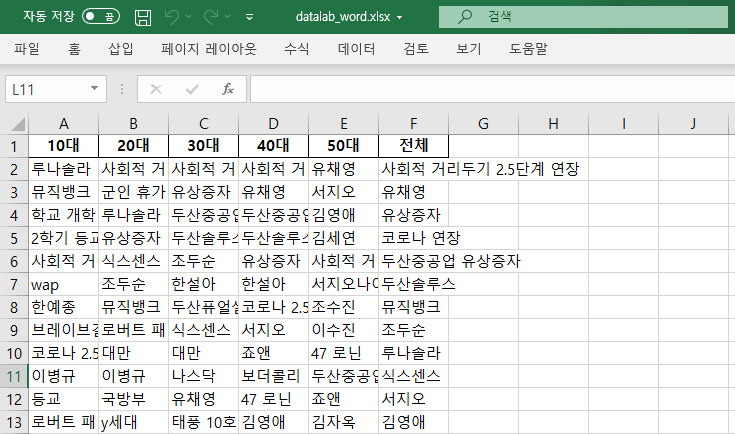

In [3]:
path = "../img/selenium05.png"
display(Image.open(path))

Copyright 2020 LIM DJ(예영Edu Co.) all rights reserved. <br>
교육용으로 작성된 것으로 배포 및 복제시에 사전 허가가 필요합니다. <br>